<a href="https://colab.research.google.com/github/Jonchyk/Vis/blob/main/PS1_vis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

#SETUP

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas


note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


#Research Problem                                         
Note - this is a draft that is being revised, edited, and fixed for capstone.

Research Problem Statement
The final proposed research aims to explore the relationship between Grade 2 test scores and National Scholarship Test scores in Kyrgyzstan. Specifically, the study will examine how these scores vary across regions, languages of instruction, and subnational socio-economic indicators. This research is significant because prior studies in international education emphasize that early-grade literacy and numeracy acquisition is critical for future learning success. Those who do not learn to level early, will struggle to catch up in the future and see their educational progress and outcomes stymied as a result.

Understanding whether disparities in test scores observed at later stages are present as early as Grade 2 will help inform education policy. Equipped with this information, policymakers could assess the effectiveness of maintaining two official languages and the impacts of urbanization on educational equity.
Research Aim: Testing

The primary aim of this research is to primarily investigate the correlation between early-grade learning outcomes and later academic performance, using a lens of region, language, and subnational data to further explore the relationships. The research draws on the following insights from the literature:
1.	Early-grade literacy and numeracy acquisition are critical and serves as a strong predictor of future academic success.
2.	Kyrgyzstan is a multilingual country with two official languages (Kyrgyz and Russian), with other local languages spoken depending on ethnic background.
3.	Rapid population growth and urbanization have concentrated wealth, opportunities, and funding in the capital, Bishkek.
4.	Kyrgyzstan’s geography presents significant challenges to its educational system due to hazardous mountain passes, frequent natural disasters (e.g., landslides), and the remoteness of many schools.
5.	National Scholarship Test scores show disparities based on language of instruction and geography: students taking the test in Russian and those in Bishkek consistently perform better than their peers in other regions.
Based on this information, this research will test whether these factors can be linked to disparities in early-grade educational outcomes. The hypothesis is that regional, linguistic, and socio-economic differences will be seen to be present at Grade 2, and will contribute to ongoing long-term disparities in academic achievement, as reflected in current scholarship testing outcomes. This would indicate the problem is more systematic and continuing.

Proposed Research Questions
1.	Can the regional and linguistic disparities observed in National Scholarship Test scores also be identified as early as Grade 2?
2.	How does the language of instruction affect Grade 2 reading and numeracy scores within and across regions?


#PS1 - Datasets:

1. Kyrgyz Bureau of Labor Statistics, Per Capita Income (cleaned to USD)
2. UN Global Data Lab, Population Statistics with CAGR appended
3. EGRA dataset
4. INFORM Disaster Incidence Dataset

**First Merge**:  will be merging dataset 1 + 2. per capita income converted to USD and the population growth in Kyrgyzstan by Region.

This will be interesting as we can compare how income has grown in line with population. The population data is from the UN global data lab, while the per capita income is from the Kyrgyz Bureau of Statistics.

This will help me get an idea around the demographics issues i've read about in Kyrgyzstan, and perhaps point me to future data I need to gather/run to better understand what is happening in the country.


**Second Merge**: For my second Merge - will take the EGRA data and the INFORM Disaster incidence data and merge on region.

I'll do some data cleaning per the instructions for PS1. Noting, I will need to do more with the EGRA to ensure I select the exact variables I need, and nothing more. Right now i'm still reviewing that data - I figure it will be reasonable to finalize cleaning the EGRA data to a more finalized format for PS2.

##Merge 1 - Per Capita Income in USD and Population - Subnational Level


In [2]:
#download file from online and save in colab as pop.csv;
!wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv
#download the income file as well.
!wget -q -O income.csv https://docs.google.com/spreadsheets/d/1IQ6YXPmOTZReA-DLWcKqbzkxAsplvrZM9ggXKITnhO4/export?format=csv

In [3]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
income.csv  pop1.csv  sample_data


In [4]:
#read in my files
pop = pd.read_csv('pop1.csv')
pop
income = pd.read_csv('income.csv')
income

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,CAGR
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,5.72,5.84,5.96,6.08,6.20,6.32,6.44,6.57,6.69,1.52
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.48,0.47,0.47,0.46,0.46,0.46,0.45,0.45,0.38
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,0.78,0.75,0.86,0.97,1.08,1.19,1.31,1.42,1.53,3.53
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,1.01,1.04,1.03,1.01,0.99,0.98,0.96,0.95,0.93,0.84
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.47,0.44,0.45,0.47,0.48,0.50,0.51,0.53,0.54,1.41
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.07,1.15,1.13,1.10,1.07,1.05,1.02,0.99,0.96,0.12
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.27,0.28,0.28,0.29,0.29,0.30,0.30,0.31,0.31,1.20
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.39,1.41,1.45,1.49,1.53,1.57,1.62,1.66,1.70,1.33
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.29,0.30,0.29,0.29,0.28,0.28,0.27,0.27,0.26,1.19


,Region,2019,2020,2021,2022,2023
0,Kyrgyz Republic,65.01,64.33,76.02,90.89,111.10
1,Batken oblast,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abat oblast,60.53,61.92,76.30,94.38,118.10
3,Yssyk-Kul oblast,65.40,73.57,82.03,104.23,115.56
4,Naryn oblast,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas oblast,55.28,60.18,65.55,79.89,96.13
7,Chui oblast,69.94,66.03,77.25,91.20,106.32
8,Bishkek city,72.51,68.76,79.43,97.02,123.12
9,Osh city,55.94,54.55,63.16,67.69,86.69


In [5]:
#rename names so we can merge - replace method.
income['Region'] = income['Region'].replace({
    'Kyrgyz Republic': 'Total',
    'Batken oblast': 'Batken',
    'Jalal-Abat oblast': 'Jalal-Abad',
    'Yssyk-Kul oblast': 'Issyk-Kul',
    'Naryn oblast': 'Naryn',
    'Osh city': 'Osh',
    'Talas oblast': 'Talas',
    'Chui oblast': 'Chuy',
    'Bishkek city': 'Bishkek'
})
income
#not great that  osh and osh city are here. can't merge those, though perhaps we could play with pop data to backtest a merged amount.
#for now let's drop osh oblast and focus on the city since this is just for ease of use.
income.drop(index=5, inplace=True)
income


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


In [6]:
#can i try merging now?
popincome = pd.merge(pop, income, on='Region', how='outer')

#ok! this is cool. I think i need to clean up the columns since now i have 2019_x, and y. that's a good lesson for next time to do it prior to merging. beginner's mistake.
popincome.rename(columns={'2019_x':'2019','2020_x':'2020','2021_x':'2021','2019_y': '2019 income', '2020_y': '2020 income', '2021_y': '2021 income', '2022':'2022 income', '2023':'2023 income'}, inplace=True)
popincome

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [7]:
popincome.columns #list var names

Index(['Region', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'CAGR', '2019 income', '2020 income',
       '2021 income', '2022 income', '2023 income'],
      dtype='object')

In [8]:
popincome.head(2)
popincome.tail(2)

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12


,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [9]:
popincome #get spreadsheet view: can sort on cols, filter, and copy

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [15]:
#while maybe it's not useful data, it would be interesting to see what the income per region is. I have population in millions, and a per capita income I calculated previously. one multiplied by the other gives the gross income per region
popincome['2019 income'] = pd.to_numeric(popincome['2019 income'], errors='coerce')
popincome['2019 income'] = pd.to_numeric(popincome['2019 income'], errors='coerce')

popincome['2019_reginc'] = (popincome['2019'] * popincome['2019 income'])

popincome['2019_reginc'] = (popincome['2019_reginc'] * 1000000) #since population is in millions, we need to adjust this.




So, using two seperate data sources we've calculated what could be the national income in 2019.

In [12]:
popincome #did I manage to add it?

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income,2019_natinc
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95,28124400.0
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12,94988100.0
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32,67142400.0
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56,33354000.0
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10,61740600.0
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80,15999000.0
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69,90622800.0
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13,14925600.0
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10,418664400.0


In [16]:
#let's look at the region, start year, end year, and the CAGR i calculated in datamanagement.

popincome[["Region","2003", "2021", "CAGR"]][0:9]


,Region,2003,2021,CAGR
0,Batken,0.42,0.45,0.38
1,Bishkek,0.78,1.53,3.53
2,Chuy,0.80,0.93,0.84
3,Issyk-Kul,0.42,0.54,1.41
4,Jalal-Abad,0.93,0.96,0.12
5,Naryn,0.25,0.31,1.20
6,Osh,1.37,1.70,1.33
7,Talas,0.21,0.26,1.19
8,Total,5.04,6.69,1.52


In [17]:
#instead of just calculating the mean, what if we calculated the total difference 2021 - 2003?
popincome['grosspopchg'] = popincome['2021'] - popincome['2003']
popincome

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income,2019_natinc,2019_reginc,grosspopchg
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.38,61.14,61.60,70.96,86.13,112.95,28124400.0,28124400.0,0.03
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.53,3.53,72.51,68.76,79.43,97.02,123.12,94988100.0,94988100.0,0.75
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.93,0.84,69.94,66.03,77.25,91.20,106.32,67142400.0,67142400.0,0.13
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.54,1.41,65.40,73.57,82.03,104.23,115.56,33354000.0,33354000.0,0.12
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,0.96,0.12,60.53,61.92,76.30,94.38,118.10,61740600.0,61740600.0,0.03
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.31,1.20,53.33,52.47,66.42,81.15,94.80,15999000.0,15999000.0,0.06
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.70,1.33,55.94,54.55,63.16,67.69,86.69,90622800.0,90622800.0,0.33
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.26,1.19,55.28,60.18,65.55,79.89,96.13,14925600.0,14925600.0,0.05
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.69,1.52,65.01,64.33,76.02,90.89,111.10,418664400.0,418664400.0,1.65


In [18]:
popincome["2019 income"].value_counts(dropna=False) #.nlargest(3) a tab or freq table. This doesn't work well with my current data

,count
2019 income,
61.14,1
72.51,1
69.94,1
65.40,1
60.53,1
53.33,1
55.94,1
55.28,1
65.01,1


<Axes: >

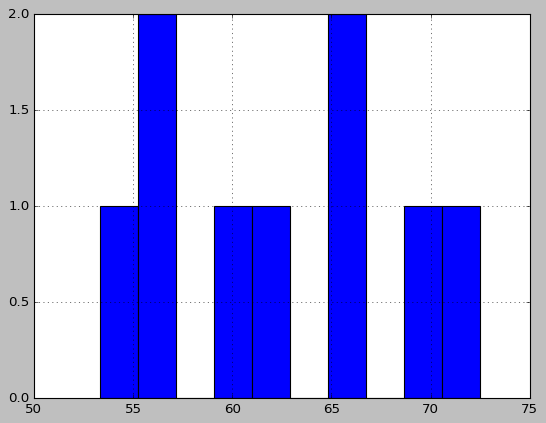

In [19]:
popincome["2019 income"].hist() #done, but not sure this is great

<Axes: xlabel='Region', ylabel='[2019 income]'>

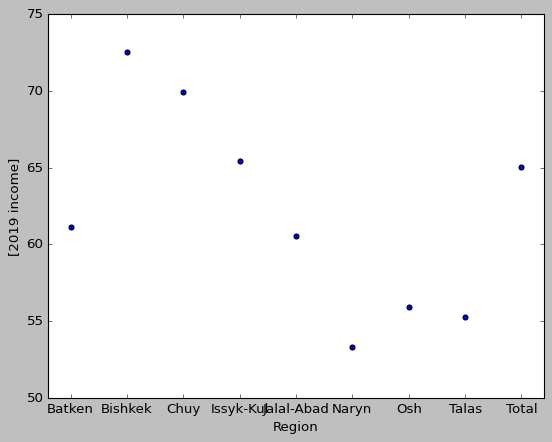

In [20]:
popincome.plot(kind='scatter', y=['2019 income'], x='Region') #This is what sparked me going back and merging the two files; region vs incomes isn't interesting. Population vs income is!

Text(0.46, 61.14, 'Batken')

Text(1.31, 72.51, 'Bishkek')

Text(0.96, 69.94, 'Chuy')

Text(0.51, 65.4, 'Issyk-Kul')

Text(1.02, 60.53, 'Jalal-Abad')

Text(0.3, 53.33, 'Naryn')

Text(1.62, 55.94, 'Osh')

Text(0.27, 55.28, 'Talas')

Text(6.44, 65.01, 'Total')

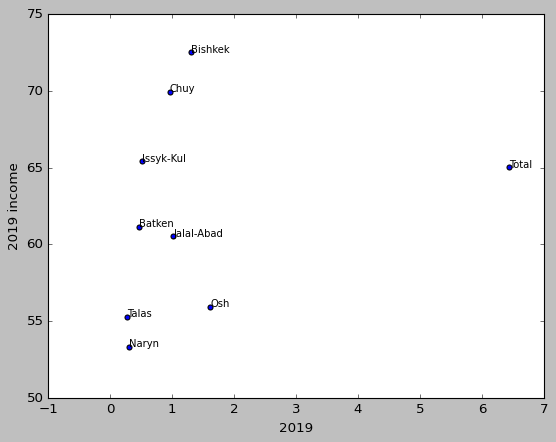

In [21]:
#So apparently, if I want to create a scatterplot with labels, need to use the following code and "ax"...Will learn more to see if there's a differnet way to do it.
ax = popincome.plot(kind='scatter', x='2019', y='2019 income')
# Add region labels to the plot using the following:
for i, row in popincome.iterrows():
    ax.text(row['2019'], row['2019 income'], row['Region'], fontsize=9)

Text(0.45, 61.6, 'Batken')

Text(1.42, 68.76, 'Bishkek')

Text(0.95, 66.03, 'Chuy')

Text(0.53, 73.57, 'Issyk-Kul')

Text(0.99, 61.92, 'Jalal-Abad')

Text(0.31, 52.47, 'Naryn')

Text(1.66, 54.55, 'Osh')

Text(0.27, 60.18, 'Talas')

Text(6.57, 64.33, 'Total')

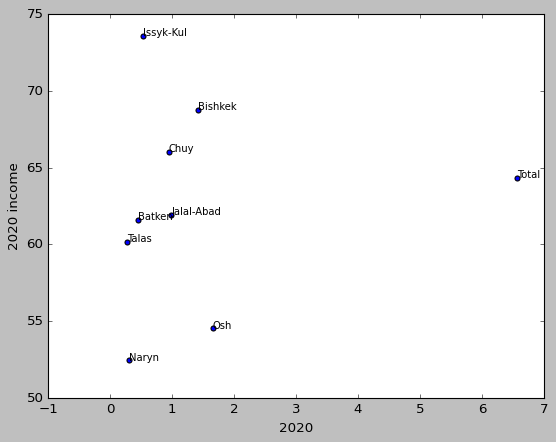

In [22]:
# doing this for 2020 now.
ax = popincome.plot(kind='scatter', x='2020', y='2020 income')
# Add region labels to the plot
for i, row in popincome.iterrows():
    ax.text(row['2020'], row['2020 income'], row['Region'], fontsize=9)
#interesting to note Issyk-Kul jumped way up!

In [23]:
#finalstep, let's get that csv file i merged all downloaded!
from google.colab import files
#convert dataframe to csv
popincome.to_csv('pop_incomepercapita.csv', index=False)

# Download the file.
files.download('pop_incomepercapita.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Recap - Merge 1
I'm not sure this merge will be useful for the final product, but this was helpful practice in both renaming, checking datatypes, changing datatypes (Str or int) and cleaning up files and naming conventions. The fact that this doesn't have a seperate Osh vs Osh City for income isn't helpful. I still can use the population data however for down below (when I need to do further merges for later problem sets).

It is cool to notice how per capita income has doubled; and I now have questions about the population breakout because the per capita income reported is far less than the actual median income in Kyrgyzstan. There has to be either a really high level of unemployment, or a really large youth and elderly population skewing the data down. I'll have to find another dataset on population percentage by age breakout (UN global datalab has one) and employment statistics.


##Merge 2 - EGRA Data and Disaster Incidence
Will load the EGRA dataset and the Disaster Incidence Data from Inform here.

For the EGRA data, will aggregrate scores by region, after renaming region. Will drop most variables, but will keep the reading comp scores and numeracy scores.

Will clean, rename/replace region, and merge on region





In [24]:
# let's load the EGRA data
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv' -O Datareading.csv
#and let's load the inform disaster incidence data
!wget --no-check-certificate "https://docs.google.com/spreadsheets/d/1CMnd_Q6dslsVYN3u1ueaugox47WUwEFQr2R_cqomBys/export?format=csv&gid=16033786" -O disaster.csv
#defining both datasets now
egra = pd.read_csv('Datareading.csv')
disaster = pd.read_csv('disaster.csv')


--2025-02-09 20:56:19--  https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv
Resolving docs.google.com (docs.google.com)... 74.125.203.102, 74.125.203.138, 74.125.203.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.102|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/0inma0irmad5cl7vhurh592rog/1739134580000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv [following]
--2025-02-09 20:56:20--  https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/0inma0irmad5cl7vhurh592rog/1739134580000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv
Resolving doc-0c-7s-sheets.googleusercontent.com (doc-0c-7s-sheets.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-0c-7s-sheets.googleuserconte

<ipython-input-24-140ff91c9ba7>:6: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,27,28,30,31,32,33,34,35,36,37,38,39,44,45,46,50,52,58,59,60,67,69,70,71,80,90,95,96,100,101,102,104,108,109,110,115,121,128,132,133,134,136,137,138,139,140,141,146,147,148,152,155,156,157,158,159,167,168,176,178,179,185,192,200,201,212,219,220,229,230,241,242,243,245,253,254,263,267,268,269,271,276,277,278,280,281,290,291,292,293,294,300,301,305,306,307,311,312,313,314,315,323,324,326,327,328,333,337,338,391,392,393,396,397,452,453,454,455,456,457,458,459,460,461,462,463,464,465,468,469,475,476,478,479,485,486,488,489,500,501,503,504,510,511,513,514,520,521,523,524,533,535,549,551,555,559,563,565,567,569,571,572,573,574,575,576,582,583,584,585,586,587,588,592,593,604,605,608,610,624,626,629,630,631,632,633,634,637,638,639,640,642,643,644,645,647,648,649,650,652,653,654,655,660,661,662,663,664,665,667,670,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696

In [25]:
disaster.head(1)
egra.head(1)
#same issues as in data management. Need to do some initial cleaning on both. Let's start with the disaster file.


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,COUNTRY,FIRST ADMINISTRATIVE LEVEL,ISO3+PCODE,Earthquake,Flood,Landslide,Drought,Natural,Projected conflict risk,Current conflict,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Reliability Index (*),Number of Missing Datasets,% of Missing Datasets,Recentness data (average years),Ratio of subnational vs national data


,region,district,school_code,language,language_name,urbanrural,loi,school_name,treatment,loi_name,...,location_schooldistrict_level,location_schoolschool_parent,location_schoolschool_id,location_schoolschool_level,ci_,invent_worditem_at_time,oral_readitem_at_time,sil_readitem_at_time,userprofileitem1female,strata1
0,In which region is the student's school located?,In which district is the student's school loca...,School's code within country.,Language of Assessment,For what language of instruction was this scho...,Urban/Rural,School Language(s) of Instruction,schoolname,Treament/Comparison Indicator,School Language(s) of Instruction,...,location_school.District_level,location_school.School_parent,location_school.School_id,location_school.School_level,ci_,invent_word.item_at_time,oral_read.item_at_time,b_oral_read.item_at_time,user-profile.item1.female,strata1


In [26]:
#let's roll the index 0 up to the column names. Set columns to index 0
disaster.columns = disaster.iloc[0]
#now we need to drop index 0 data entirely
disaster = disaster.drop(0)
#rerun and let's see if it worked this time!
disaster

,COUNTRY,FIRST ADMINISTRATIVE LEVEL,ISO3+PCODE,Earthquake,Flood,Landslide,Drought,Natural,Projected conflict risk,Current conflict,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Reliability Index (*),Number of Missing Datasets,% of Missing Datasets,Recentness data (average years),Ratio of subnational vs national data
1,(a-z),(a-z),(a-z),(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),...,(0-10),(0-10),(0-10),(V.Low-V.High),(1-83),(0-10),(0-54),(0-100%),(0-...),(0-...)
2,Armenia,Aragatsotn,AM02,6.5,4.2,0.0,3.8,4.0,6.9,7.6,...,4.8,5.0,4.8,Medium,32,6.0,1,2%,0.75,0.97
3,Armenia,Ararat,AM03,6.5,8.0,0.0,5.5,5.6,6.9,7.6,...,4.3,4.6,4.7,Medium,33,6.0,1,2%,0.75,0.97
4,Armenia,Armavir,AM04,6.9,6.0,0.0,7.5,5.7,6.9,7.6,...,4.2,4.5,4.7,Medium,33,6.0,1,2%,0.75,0.97
5,Armenia,Gegharkunik,AM05,8.9,3.2,0.5,3.6,5.0,6.9,7.6,...,4.6,4.7,4.6,Medium,35,6.0,1,2%,0.75,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Uzbekistan,Tashkent,UZ1727,7.2,6.7,4.7,5.0,6.0,3.7,4.4,...,4.8,5.0,3.9,Low,51,2.8,0,0%,0.55,1.10
84,Uzbekistan,Tashkent (city),UZ1726,6.8,0.1,0.0,6.2,4.0,3.7,4.4,...,2.4,3.6,3.3,Very Low,66,2.8,0,0%,NaN,1.10
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#cool. Now let's change the name of FIRST ADMINISTRATIVE LEVEL to "region". Then filter Country for Kyrgyzstan
disaster.rename(columns={'FIRST ADMINISTRATIVE LEVEL': 'region'}, inplace=True) # Rename the column in place
disaster.rename(columns={'COUNTRY': 'country'}, inplace=True) # Rename the column in place

#let's sort this to the country of interest. We don't need the other countries.
disaster = disaster[disaster['country'] == 'Kyrgyzstan']
#let's keep what I need. the regions, and incifdence ratings of natural disasters.
disaster = disaster[['country', 'region', 'Earthquake', 'Flood', 'Landslide', 'Drought', 'Natural']]
disaster

,country,region,Earthquake,Flood,Landslide,Drought,Natural
34,Kyrgyzstan,Batken,5.4,5.7,7.5,7.2,6.5
35,Kyrgyzstan,Bishkek (city),6.5,6.4,0.0,0.0,3.9
36,Kyrgyzstan,Chui,6.8,5.0,8.6,2.0,6.2
37,Kyrgyzstan,Issyk-Kul,8.2,4.7,9.1,2.5,6.9
38,Kyrgyzstan,Jalal-Abad,9.4,7.3,9.4,9.3,9.0
39,Kyrgyzstan,Naryn,5.9,5.2,9.1,2.0,6.2
40,Kyrgyzstan,Osh,9.5,6.5,9.5,7.7,8.6
41,Kyrgyzstan,Osh (city),8.9,7.0,0.0,9.2,7.4
42,Kyrgyzstan,Talas,5.9,5.6,2.5,6.4,5.3


In [28]:
#let's rename regions to remove "(city)" from Bishkek and () from Osh, which will now just be Osh City. Will make our merge easier.
disaster['region'] = disaster['region'].replace({
    'Bishkek (city)': 'Bishkek',
    'Osh (city)': 'Osh city'
})
disaster

,country,region,Earthquake,Flood,Landslide,Drought,Natural
34,Kyrgyzstan,Batken,5.4,5.7,7.5,7.2,6.5
35,Kyrgyzstan,Bishkek,6.5,6.4,0.0,0.0,3.9
36,Kyrgyzstan,Chui,6.8,5.0,8.6,2.0,6.2
37,Kyrgyzstan,Issyk-Kul,8.2,4.7,9.1,2.5,6.9
38,Kyrgyzstan,Jalal-Abad,9.4,7.3,9.4,9.3,9.0
39,Kyrgyzstan,Naryn,5.9,5.2,9.1,2.0,6.2
40,Kyrgyzstan,Osh,9.5,6.5,9.5,7.7,8.6
41,Kyrgyzstan,Osh city,8.9,7.0,0.0,9.2,7.4
42,Kyrgyzstan,Talas,5.9,5.6,2.5,6.4,5.3


Ok! This dataset is now ready to merge with the EGRA. I'll need to load up the EGRA, rename columns, and to start, just select the columsn I need!


In [29]:
#all the current region names are in russian. These need to be changed to english for merging
egra['region'].unique()


array(["In which region is the student's school located?", 'Ошская',
       'г. Ош', 'Чуйская', 'Таласская', 'Иссык-Кульская', 'г. Бишкек',
       'Жалал-Абадская', 'Нарынская', 'Баткенская'], dtype=object)

In [30]:
egra['region'].replace({'Ошская': 'Osh', 'г. Ош' : 'Osh city', 'Чуйская':'Chui', 'Таласская':'Talas', 'Иссык-Кульская':'Issyk-Kul', 'г. Бишкек':'Bishkek','Жалал-Абадская': 'Jalal-Abad', 'Нарынская':'Naryn','Баткенская':'Batken'}, inplace=True)

<ipython-input-30-118fc27ab4be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  egra['region'].replace({'Ошская': 'Osh', 'г. Ош' : 'Osh city', 'Чуйская':'Chui', 'Таласская':'Talas', 'Иссык-Кульская':'Issyk-Kul', 'г. Бишкек':'Bishkek','Жалал-Абадская': 'Jalal-Abad', 'Нарынская':'Naryn','Баткенская':'Batken'}, inplace=True)


In [31]:
egra

,region,district,school_code,language,language_name,urbanrural,loi,school_name,treatment,loi_name,...,location_schooldistrict_level,location_schoolschool_parent,location_schoolschool_id,location_schoolschool_level,ci_,invent_worditem_at_time,oral_readitem_at_time,sil_readitem_at_time,userprofileitem1female,strata1
0,In which region is the student's school located?,In which district is the student's school loca...,School's code within country.,Language of Assessment,For what language of instruction was this scho...,Urban/Rural,School Language(s) of Instruction,schoolname,Treament/Comparison Indicator,School Language(s) of Instruction,...,location_school.District_level,location_school.School_parent,location_school.School_id,location_school.School_level,ci_,invent_word.item_at_time,oral_read.item_at_time,b_oral_read.item_at_time,user-profile.item1.female,strata1
1,Osh,Араванский,1S32310502,Kyrgyz,Kyrgyz,Rural,KRU,СШ им.С.Шарипова,Control,KRU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021--Comparison Kyrgyz
2,Osh city,г. Ош,013RTICODE,Kyrgyz,Kyrgyz,Urban,KR,№2 К. Маркса,Control,KR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021--Comparison Kyrgyz
3,Osh,Кара-Сууский,2S32320402,Kyrgyz,Kyrgyz,Rural,KR,Н. Примбердиев,Control,KR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021--Comparison Kyrgyz
4,Chui,Ысык-Атинский,011RTICODE,Kyrgyz,Kyrgyz,Rural,K,СШ О. Болеболаев,Control,K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021--Comparison Kyrgyz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,Jalal-Abad,Сузакский,1S37481302,Uzbek,Uzbek,Rural,KRU,СШ №15 им. М. Юсупова,Treatment,KRU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024--Program Uzbek
5271,Jalal-Abad,Сузакский,1S37480102,Uzbek,Uzbek,Rural,U,СШ №88 им. С. АTабекова,Treatment,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024--Program Uzbek
5272,Osh,Араванский,1S32310609,Uzbek,Uzbek,Rural,U,ОШ №37 им. Каримкула Мухаммедова,Treatment,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024--Program Uzbek
5273,Batken,Лейлекский,1S36560304,Uzbek,Uzbek,Rural,U,"СШ ""Хамза""",Treatment,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024--Program Uzbek


In [32]:
#let's see if we can convert all our "2021"'s to a string so its the same value
egra['g2_year'] = egra['g2_year'].apply(lambda x: '2021' if str(x) == '2021' else x)

In [33]:
#now I can finally filter to the data I want.
baseline = egra[egra['g2_year'] == '2021']


In [34]:
baseline.count()


,0
region,2582
district,2582
school_code,2582
language,2582
language_name,2582
...,...
invent_worditem_at_time,0
oral_readitem_at_time,0
sil_readitem_at_time,0
userprofileitem1female,0


In [35]:
baseline.head(1)

,region,district,school_code,language,language_name,urbanrural,loi,school_name,treatment,loi_name,...,location_schooldistrict_level,location_schoolschool_parent,location_schoolschool_id,location_schoolschool_level,ci_,invent_worditem_at_time,oral_readitem_at_time,sil_readitem_at_time,userprofileitem1female,strata1
1,Osh,Араванский,1S32310502,Kyrgyz,Kyrgyz,Rural,KRU,СШ им.С.Шарипова,Control,KRU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021--Comparison Kyrgyz


In [36]:
#can i try merging now?
egradis = pd.merge(baseline, disaster, on='region', how='outer', indicator=True)
egradis

,region,district,school_code,language,language_name,urbanrural,loi,school_name,treatment,loi_name,...,sil_readitem_at_time,userprofileitem1female,strata1,country,Earthquake,Flood,Landslide,Drought,Natural,_merge
0,Batken,Кадамжайский,1S36550901,Kyrgyz,Kyrgyz,Rural,K,«Айрыбаз»,Control,K,...,NaN,NaN,2021--Comparison Kyrgyz,Kyrgyzstan,5.4,5.7,7.5,7.2,6.5,both
1,Batken,Кадамжайский,1S36550702,Kyrgyz,Kyrgyz,Rural,K,№23 Ж. Боконбаев(алыс),Control,K,...,NaN,NaN,2021--Comparison Kyrgyz,Kyrgyzstan,5.4,5.7,7.5,7.2,6.5,both
2,Batken,Кадамжайский,1S36550203,Kyrgyz,Kyrgyz,Rural,K,"""Мин-Чынар""",Control,K,...,NaN,NaN,2021--Comparison Kyrgyz,Kyrgyzstan,5.4,5.7,7.5,7.2,6.5,both
3,Batken,Кадамжайский,1S36550203,Kyrgyz,Kyrgyz,Rural,K,"""Мин-Чынар""",Control,K,...,NaN,NaN,2021--Comparison Kyrgyz,Kyrgyzstan,5.4,5.7,7.5,7.2,6.5,both
4,Batken,Кадамжайский,1S36550902,Kyrgyz,Kyrgyz,Rural,K,К. Саттаров,Control,K,...,NaN,NaN,2021--Comparison Kyrgyz,Kyrgyzstan,5.4,5.7,7.5,7.2,6.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Talas,Таласский,1S34220003,Russian,Russian,Urban,R,ШГ №3 им. К. Дарданова,Treatment,R,...,NaN,NaN,2021--Program Russian,Kyrgyzstan,5.9,5.6,2.5,6.4,5.3,both
2578,Talas,Таласский,1S34220003,Russian,Russian,Urban,R,ШГ №3 им. К. Дарданова,Treatment,R,...,NaN,NaN,2021--Program Russian,Kyrgyzstan,5.9,5.6,2.5,6.4,5.3,both
2579,Talas,Таласский,1S34220003,Russian,Russian,Urban,R,ШГ №3 им. К. Дарданова,Treatment,R,...,NaN,NaN,2021--Program Russian,Kyrgyzstan,5.9,5.6,2.5,6.4,5.3,both
2580,Talas,Таласский,1S34220003,Russian,Russian,Urban,R,ШГ №3 им. К. Дарданова,Treatment,R,...,NaN,NaN,2021--Program Russian,Kyrgyzstan,5.9,5.6,2.5,6.4,5.3,both


In [37]:
#quick check, any mismatch in the merges?
egradis['_merge'].value_counts()
#all are "both"! We are golden :-)

,count
_merge,
both,2582
left_only,0
right_only,0


In [38]:
egradis.groupby(['region', 'urbanrural']).size() #Let's look at our breakout for urban/rural by region

region      urbanrural
Batken      Rural         243
            Urban          58
Bishkek     Urban         318
Chui        Rural         273
            Urban          68
Issyk-Kul   Rural         182
            Urban          48
Jalal-Abad  Rural         518
            Urban          62
Naryn       Rural          88
            Urban           8
Osh         Rural         424
            Urban          13
Osh city    Urban         139
Talas       Rural         120
            Urban          20
dtype: int64

In [39]:
#I'll need to select each and every single item I need and convert to the proper attribute (string or integer) I'm not doing that just yet, save it for a future PS. hope that is ok professor!
#for now, I want to just get the listening comprehension score percentage aggregrated by region
egradis['list_comp_score_pcnt'] = pd.to_numeric(egradis['list_comp_score_pcnt'], errors='coerce')
#grouping by region, we're taking hte median, mean, and count
listcomp = egradis.groupby(['region', 'urbanrural','language'])['list_comp_score_pcnt'].agg(['median', 'mean', 'count']).reset_index()
listcomp

,region,urbanrural,language,median,mean,count
0,Batken,Rural,Kyrgyz,60.0,60.287770,139
1,Batken,Rural,Russian,0.0,8.000000,10
2,Batken,Rural,Tajik,100.0,89.000000,20
3,Batken,Rural,Uzbek,100.0,96.712329,73
4,Batken,Urban,Russian,20.0,32.857143,28
5,Batken,Urban,Tajik,100.0,90.000000,10
6,Batken,Urban,Uzbek,100.0,99.000000,20
7,Bishkek,Urban,Kyrgyz,80.0,67.656250,128
8,Bishkek,Urban,Russian,80.0,78.518519,189
9,Chui,Rural,Kyrgyz,80.0,77.961783,157


###Recap Merge 2
I now have the EGRA dataset, and the inform disaster dataset in one file. I still need to do a ton of cleaning of the EGRA dataset down to the variables that matter most to me, but I figure I can save a bit of that for PS2 for both classes.
There'll be actual comparisons to be run between the "regional scores" and natural disaster incidents at a later time, but i've done some elementary items that shaped this up.
I think the above table is super interesting, and also shows how powerful python is once I get my head around how it all really works. Being able to break it out by region, urban or rural type, language, and the scores of a subtask is really cool! There's going to be tons of ways to mine this data for interesting points.
